In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic monthly demand data (Jan 2010 - Dec 2015, 72 months)
dates = pd.date_range(start='2010-01-01', end='2015-12-01', freq='M')
demand = 125 + 0.9 * np.random.normal(0, 28, len(dates)).cumsum() + np.random.normal(0, 10, len(dates))
data = pd.DataFrame({'ds': dates, 'y': demand})

In [4]:
data

,ds,y
0,2010-01-31,152.897562
1,2010-02-28,133.674676
2,2010-03-31,166.001124
3,2010-04-30,162.537589
4,2010-05-31,191.053400
...,...,...
66,2015-07-31,-133.998097
67,2015-08-31,-97.353280
68,2015-09-30,-108.683868
69,2015-10-31,-110.357643


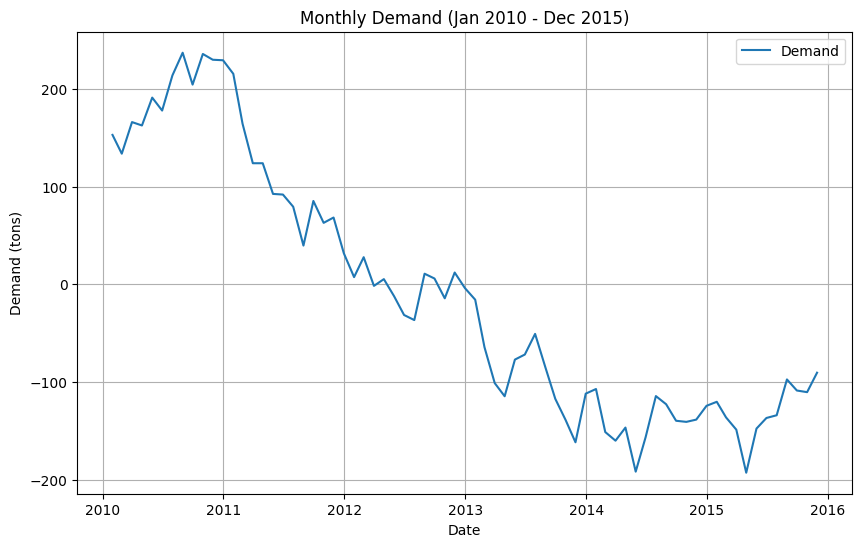

In [5]:
# Step 1: Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Demand')
plt.title('Monthly Demand (Jan 2010 - Dec 2015)')
plt.xlabel('Date')
plt.ylabel('Demand (tons)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 2: Initialize Prophet Model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,  # Monthly data, no weekly patterns
    daily_seasonality=False,   # Monthly data, no daily patterns
    changepoint_prior_scale=0.05,  # Default flexibility for trend changes
    seasonality_prior_scale=10.0   # Default for seasonality
)

In [7]:
# Step 3: Fit Model
model.fit(data)

19:05:57 - cmdstanpy - INFO - Chain [1] start processing
19:05:57 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Step 4: Create Future DataFrame for Forecasting (Jan-Oct 2016, 10 months)
future = model.make_future_dataframe(periods=10, freq='MS')
print(f"Future DataFrame shape: {future.shape}")


Future DataFrame shape: (81, 1)


In [13]:
future

,ds
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
76,2016-05-01
77,2016-06-01
78,2016-07-01
79,2016-08-01


In [14]:
# Step 5: Generate Forecast
forecast = model.predict(future)
print("\nForecast Columns:", forecast.columns)


Forecast Columns: Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,184.695302,146.460626,270.853207,184.695302,184.695302,20.341090,20.341090,20.341090,20.341090,20.341090,20.341090,0.0,0.0,0.0,205.036392
1,2010-02-28,179.274240,113.811557,231.141587,179.274240,179.274240,-5.978152,-5.978152,-5.978152,-5.978152,-5.978152,-5.978152,0.0,0.0,0.0,173.296088
2,2010-03-31,173.272351,102.682487,218.237048,173.272351,173.272351,-15.125286,-15.125286,-15.125286,-15.125286,-15.125286,-15.125286,0.0,0.0,0.0,158.147064
3,2010-04-30,167.464070,92.041735,206.864850,167.464070,167.464070,-17.792282,-17.792282,-17.792282,-17.792282,-17.792282,-17.792282,0.0,0.0,0.0,149.671789
4,2010-05-31,161.462181,97.211169,210.743684,161.462181,161.462181,-9.254873,-9.254873,-9.254873,-9.254873,-9.254873,-9.254873,0.0,0.0,0.0,152.207308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2016-05-01,-256.714804,-331.878138,-210.440472,-256.718174,-256.711242,-14.822186,-14.822186,-14.822186,-14.822186,-14.822186,-14.822186,0.0,0.0,0.0,-271.536991
77,2016-06-01,-262.705710,-310.628218,-204.019527,-262.709893,-262.701237,5.811218,5.811218,5.811218,5.811218,5.811218,5.811218,0.0,0.0,0.0,-256.894492
78,2016-07-01,-268.503362,-334.198460,-218.517411,-268.508522,-268.497763,-7.961128,-7.961128,-7.961128,-7.961128,-7.961128,-7.961128,0.0,0.0,0.0,-276.464490
79,2016-08-01,-274.494268,-313.927640,-196.336467,-274.500418,-274.487378,21.205901,21.205901,21.205901,21.205901,21.205901,21.205901,0.0,0.0,0.0,-253.288367


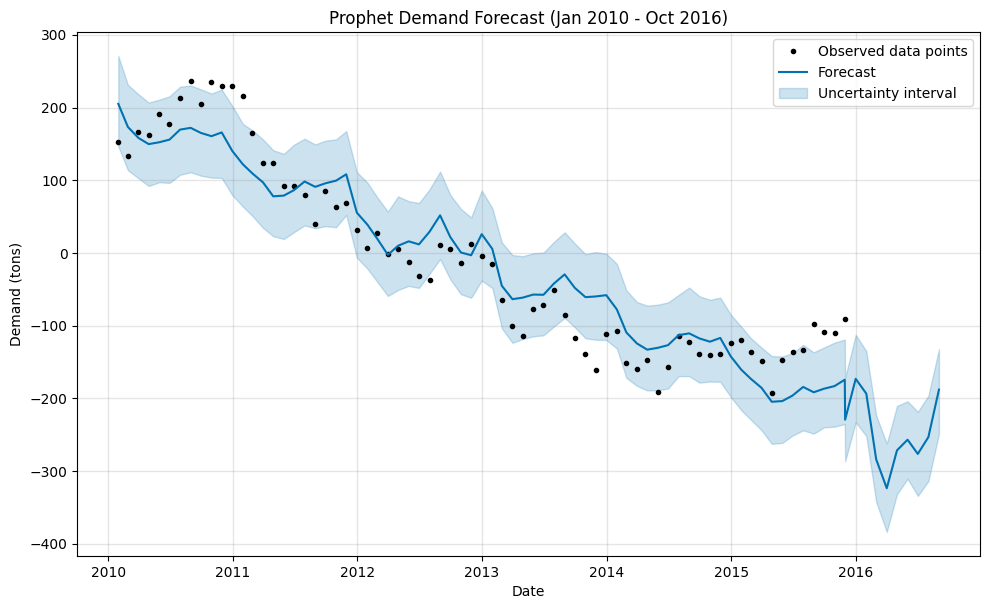

In [18]:
# Step 6: Plot Forecast
fig = model.plot(forecast)
plt.title('Prophet Demand Forecast (Jan 2010 - Oct 2016)')
plt.xlabel('Date')
plt.ylabel('Demand (tons)')
plt.grid(True)
plt.legend()
plt.show()

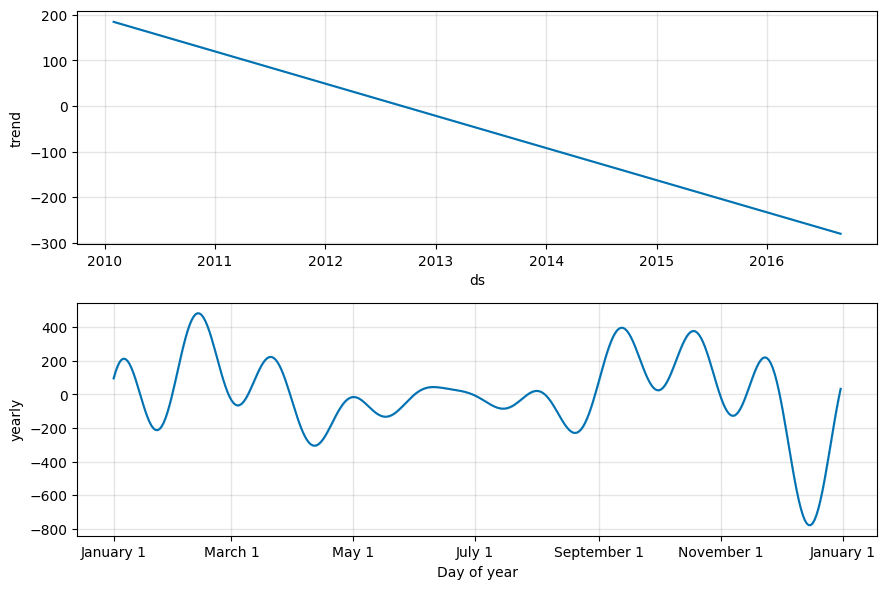

In [19]:
# Step 7: Plot Components (Trend, Seasonality)
fig = model.plot_components(forecast)
plt.show()

In [20]:
# Step 8: Save Forecast Results to CSV
forecast_subset = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
print(forecast_subset)

           ds        yhat  yhat_lower  yhat_upper
71 2015-12-01 -229.335241 -286.600175 -171.688899
72 2016-01-01 -173.142657 -232.772965 -112.682554
73 2016-02-01 -193.495398 -251.930535 -134.960834
74 2016-03-01 -283.881261 -342.446419 -223.520678
75 2016-04-01 -323.642681 -383.737470 -262.211033
76 2016-05-01 -271.536991 -331.878138 -210.440472
77 2016-06-01 -256.894492 -310.628218 -204.019527
78 2016-07-01 -276.464490 -334.198460 -218.517411
79 2016-08-01 -253.288367 -313.927640 -196.336467
80 2016-09-01 -187.974375 -248.650241 -132.349222


In [ ]:
# Step 9: Cross-Validation (Optional, for performance evaluation)
df_cv = cross_validation(model, initial='1460 days', period='180 days', horizon='180 days')
df_metrics = performance_metrics(df_cv)

print("\nCross-Validation Metrics:")
print(df_metrics[['horizon', 'mae', 'mse', 'rmse']].head())

  0%|          | 0/3 [00:00<?, ?it/s]

19:16:03 - cmdstanpy - INFO - Chain [1] start processing
19:16:04 - cmdstanpy - INFO - Chain [1] done processing
19:16:04 - cmdstanpy - INFO - Chain [1] start processing
19:16:04 - cmdstanpy - INFO - Chain [1] done processing
19:16:04 - cmdstanpy - INFO - Chain [1] start processing
19:16:04 - cmdstanpy - INFO - Chain [1] done processing



Cross-Validation Metrics:
  horizon         mae           mse        rmse
0 22 days   32.721466   1070.694325   32.721466
1 26 days   61.081778   3730.983575   61.081778
2 27 days  105.108629  11047.823963  105.108629
3 53 days   63.805433   4071.133327   63.805433
4 57 days   95.652176   9149.338779   95.652176
